In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam



In [2]:
# Step 1: Load the CSV files
train_df = pd.read_csv('cifar10_train.csv')
test_df = pd.read_csv('cifar10_test.csv')


In [3]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,3063,3064,3065,3066,3067,3068,3069,3070,3071,label
0,59,62,63,43,46,45,50,48,43,68,...,216,184,140,151,118,84,123,92,72,6
1,154,177,187,126,137,136,105,104,95,102,...,143,133,139,143,134,142,143,133,144,9
2,255,255,255,253,253,253,253,253,253,253,...,78,85,83,79,85,83,80,86,84,9
3,28,25,10,37,34,19,38,35,20,42,...,54,47,28,63,56,37,72,65,46,4
4,170,180,198,168,178,196,177,185,203,183,...,75,79,82,71,75,78,73,77,80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,145,161,194,151,166,199,156,171,205,155,...,39,41,56,36,38,53,37,39,54,2
49996,255,245,132,254,247,134,255,249,137,254,...,249,174,79,252,181,81,253,181,76,6
49997,35,178,235,40,176,239,42,176,241,39,...,27,52,77,21,43,66,12,31,50,9
49998,189,211,240,186,208,236,185,207,235,184,...,195,184,169,196,189,171,195,190,171,1


In [4]:
test_df

,0,1,2,3,4,5,6,7,8,9,...,3063,3064,3065,3066,3067,3068,3069,3070,3071,label
0,158,112,49,159,111,47,165,116,51,166,...,24,77,124,34,84,129,21,67,110,3
1,235,235,235,231,231,231,232,232,232,232,...,168,183,178,180,195,191,186,200,199,8
2,158,190,222,158,187,218,139,166,194,132,...,5,6,8,4,5,3,7,8,7,8
3,155,156,149,167,176,187,176,179,193,190,...,60,63,50,64,65,52,73,68,50,0
4,65,68,50,70,81,64,48,64,46,30,...,143,179,136,154,185,146,128,156,117,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,76,78,133,76,78,134,77,80,132,76,...,204,219,236,200,215,234,199,216,236,8
9996,81,57,43,91,69,53,98,75,63,106,...,155,139,129,171,167,147,167,164,160,3
9997,20,15,12,19,14,11,15,14,11,15,...,24,23,50,26,23,53,25,20,47,5
9998,25,40,12,15,36,3,23,41,18,17,...,93,124,80,95,123,81,92,120,80,1


In [5]:
# Step 2: Preprocess the Data
# Separate the features and labels
X_train = train_df.drop(columns=['label']).values  # All columns except 'label'
y_train = train_df['label'].values  # 'label' column
X_test = test_df.drop(columns=['label']).values
y_test = test_df['label'].values


In [6]:
# Normalize the pixel values to the range [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

In [7]:
# Check the shape of y_train and y_test before flattening
print(f"Shape of X_train : {X_train.shape}")
print(f"Shape of X_test : {X_test.shape}")

Shape of X_train : (50000, 3072)
Shape of X_test : (10000, 3072)


In [8]:
# Check the shape of y_train and y_test before flattening
print(f"Shape of y_train before flattening: {y_train.shape}")
print(f"Shape of y_test before flattening: {y_test.shape}")


Shape of y_train before flattening: (50000,)
Shape of y_test before flattening: (10000,)


In [9]:
# Flatten y_train and y_test
y_train = y_train.flatten()  # Should result in shape (50000,)
y_test = y_test.flatten()    # Should result in shape (10000,)

# Check the shape after flattening
print(f"Shape of y_train after flattening: {y_train.shape}")
print(f"Shape of y_test after flattening: {y_test.shape}")

Shape of y_train after flattening: (50000,)
Shape of y_test after flattening: (10000,)


In [10]:
from tensorflow.keras.utils import to_categorical

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Check the shape after one-hot encoding
print("y_train shape after one-hot encoding:", y_train.shape)
print("y_test shape after one-hot encoding:", y_test.shape)


y_train shape after one-hot encoding: (50000, 10)
y_test shape after one-hot encoding: (10000, 10)


In [11]:
# Define the ANN model
model = Sequential([
    # Input layer
    Dense(512, activation='relu', input_shape=(3072,)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Check the shape of the training and testing data
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")


Shape of X_train: (50000, 3072)
Shape of y_train: (50000, 10)
Shape of X_test: (10000, 3072)
Shape of y_test: (10000, 10)


In [13]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [14]:
# Train the model
history = model.fit(X_train, 
                    y_train, 
                    epochs=30, 
                    batch_size=32, 
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping])

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.2700 - loss: 2.0048 - val_accuracy: 0.3879 - val_loss: 1.7028
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3910 - loss: 1.6952 - val_accuracy: 0.4329 - val_loss: 1.5976
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4229 - loss: 1.6057 - val_accuracy: 0.4094 - val_loss: 1.6516
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4437 - loss: 1.5456 - val_accuracy: 0.4499 - val_loss: 1.5453
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4654 - loss: 1.5042 - val_accuracy: 0.4613 - val_loss: 1.4994
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4772 - loss: 1.4645 - val_accuracy: 0.4757 - val_loss: 1.4764
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4874 - loss: 1.4355 - val_accuracy: 0.4852 - val_loss: 1.4496
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4943 - loss: 1.4077 - 

In [15]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc * 100:.2f}%")
print(f"Test loss using train: {test_acc * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5054 - loss: 1.4334
Test accuracy: 50.19%
Test loss using train: 50.19%


## Dropout

In [25]:
#Build the ANN model
model = Sequential([
    Dense(2048, activation='relu', input_shape=(3072,)),  # 3072 input neurons (32x32x3 images)
    Dropout(0.5),  # Dropout layer to reduce overfitting
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # Output layer with 10 classes (CIFAR-10 has 10 classes)
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [26]:
# Train the model
history = model.fit(X_train,
                    y_train, 
                    epochs=100, 
                    batch_size=64, 
                    validation_data=(X_test, y_test))


Epoch 1/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 0.1225 - loss: 2.4329 - val_accuracy: 0.1850 - val_loss: 2.1762
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.1713 - loss: 2.1360 - val_accuracy: 0.2068 - val_loss: 2.1136
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.1913 - loss: 2.0967 - val_accuracy: 0.2033 - val_loss: 2.0711
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.1979 - loss: 2.0708 - val_accuracy: 0.2289 - val_loss: 2.0924
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.2076 - loss: 2.0603 - val_accuracy: 0.2159 - val_loss: 2.0538
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.2059 - loss: 2.0520 - val_accuracy: 0.2414 - val_loss: 2.0556
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.2118 - loss: 2.0393 - val_accuracy: 0.2340 - val_loss: 2.0518
Epoch 8/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.2129 - loss: 2

In [27]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

print(f"Test accuracy: {test_acc * 100:.2f}%")

313/313 - 1s - 3ms/step - accuracy: 0.2378 - loss: 1.9891
Test accuracy: 23.78%


## Sigmoid

In [28]:
#Build the ANN model
model = Sequential([
    Dense(2048, activation='sigmoid', input_shape=(3072,)),  # 3072 input neurons (32x32x3 images)
    Dense(1024, activation='sigmoid'),
    Dense(512, activation='sigmoid'),
    Dense(256, activation='sigmoid'),
    Dense(128, activation='sigmoid'),
    Dense(10, activation='softmax')  # Output layer with 10 classes (CIFAR-10 has 10 classes)
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [29]:
# Train the model
history = model.fit(X_train,
                    y_train, 
                    epochs=100, 
                    batch_size=64, 
                    validation_data=(X_test, y_test))


Epoch 1/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 0.1484 - loss: 2.1923 - val_accuracy: 0.1896 - val_loss: 2.0691
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.1977 - loss: 2.0397 - val_accuracy: 0.1835 - val_loss: 2.0907
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.2176 - loss: 1.9998 - val_accuracy: 0.2720 - val_loss: 1.8866
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.2752 - loss: 1.8997 - val_accuracy: 0.3180 - val_loss: 1.8258
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.3082 - loss: 1.8448 - val_accuracy: 0.3155 - val_loss: 1.8400
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.3176 - loss: 1.8273 - val_accuracy: 0.3199 - val_loss: 1.8188
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.3326 - loss: 1.8014 - val_accuracy: 0.3413 - val_loss: 1.7771
Epoch 8/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.3499 - loss: 1

In [30]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

print(f"Test accuracy: {test_acc * 100:.2f}%")

313/313 - 1s - 3ms/step - accuracy: 0.4635 - loss: 1.5837
Test accuracy: 46.35%


## TANh

In [31]:
#Build the ANN model
model = Sequential([
    Dense(2048, activation='tanh', input_shape=(3072,)),  # 3072 input neurons (32x32x3 images)
    Dense(1024, activation='tanh'),
    Dense(512, activation='tanh'),
    Dense(256, activation='tanh'),
    Dense(128, activation='tanh'),
    Dense(10, activation='softmax')  # Output layer with 10 classes (CIFAR-10 has 10 classes)
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [32]:
# Train the model
history = model.fit(X_train,
                    y_train, 
                    epochs=100, 
                    batch_size=64, 
                    validation_data=(X_test, y_test))


Epoch 1/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 0.1407 - loss: 2.2405 - val_accuracy: 0.1892 - val_loss: 2.0872
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.1526 - loss: 2.1742 - val_accuracy: 0.1000 - val_loss: 2.3245
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.1141 - loss: 2.2812 - val_accuracy: 0.1030 - val_loss: 2.4382
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.1011 - loss: 2.3230 - val_accuracy: 0.1000 - val_loss: 2.3130
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.0981 - loss: 2.3150 - val_accuracy: 0.1000 - val_loss: 2.3125
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.0983 - loss: 2.3132 - val_accuracy: 0.1000 - val_loss: 2.3157
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.0968 - loss: 2.3154 - val_accuracy: 0.1000 - val_loss: 2.3151
Epoch 8/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.0978 - loss: 2

In [33]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

print(f"Test accuracy: {test_acc * 100:.2f}%")

313/313 - 1s - 3ms/step - accuracy: 0.1000 - loss: 2.3165
Test accuracy: 10.00%


## Leaky relu

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU

# Build the ANN model with tanh activation for the input layer and LeakyReLU for the middle layers
model = Sequential([
    Dense(2048, input_shape=(3072,)),  # 3072 input neurons (32x32x3 images)
    LeakyReLU(alpha=0.01),  # Leaky ReLU with a small slope (alpha)
    
    Dense(1024),
    LeakyReLU(alpha=0.01),
    
    Dense(512),
    LeakyReLU(alpha=0.01),
    
    Dense(256),
    LeakyReLU(alpha=0.01),
    
    Dense(128),
    LeakyReLU(alpha=0.01),
    
    Dense(10, activation='softmax')  # Output layer with 10 classes (CIFAR-10 has 10 classes)
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


C:\Users\user\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [35]:
# Train the model
history = model.fit(X_train,
                    y_train, 
                    epochs=100, 
                    batch_size=64, 
                    validation_data=(X_test, y_test))

Epoch 1/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 0.2357 - loss: 2.1244 - val_accuracy: 0.3704 - val_loss: 1.7343
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.3667 - loss: 1.7460 - val_accuracy: 0.3961 - val_loss: 1.6699
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.4061 - loss: 1.6501 - val_accuracy: 0.4385 - val_loss: 1.5798
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.4387 - loss: 1.5727 - val_accuracy: 0.4529 - val_loss: 1.5197
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.4529 - loss: 1.5303 - val_accuracy: 0.4639 - val_loss: 1.4936
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.4651 - loss: 1.4855 - val_accuracy: 0.4640 - val_loss: 1.5101
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.4777 - loss: 1.4452 - val_accuracy: 0.4707 - val_loss: 1.4918
Epoch 8/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.4945 - loss: 1

In [36]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

print(f"Test accuracy: {test_acc * 100:.2f}%")

313/313 - 1s - 3ms/step - accuracy: 0.4779 - loss: 2.4646
Test accuracy: 47.79%


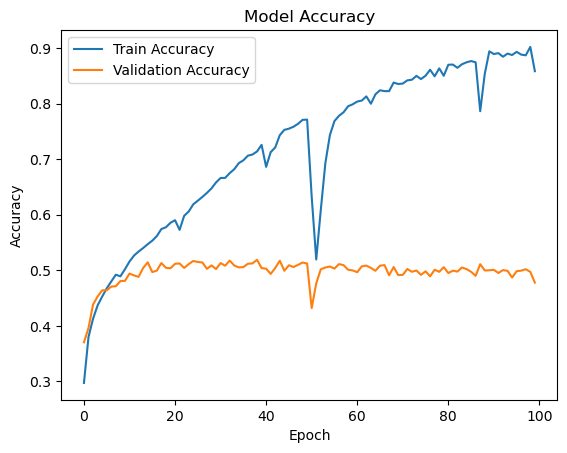

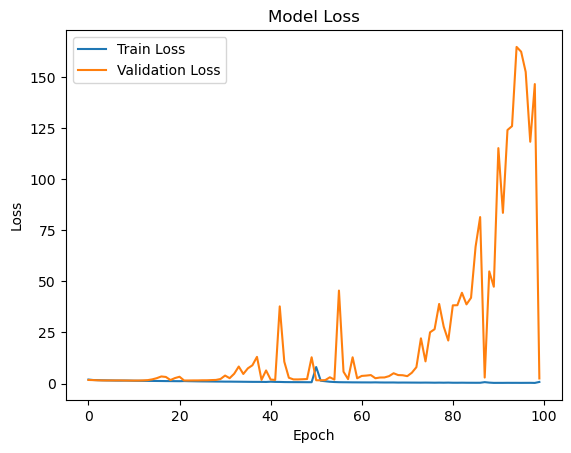

In [37]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()